#### Kayla Hoffman 
#### Github Username: kaylah176 
#### USC ID: 5610 8598 16

In [128]:
# Import libraries
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

### Tree Based Methods 
a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks. The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [129]:
# Load dataset
APS_train_raw = pd.read_csv("aps_failure_training_set.csv", skiprows=20, na_values='na')
display(APS_train_raw)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [130]:
APS_test_raw = pd.read_csv("aps_failure_test_set.csv", skiprows=20, na_values='na')
display(APS_test_raw)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


### Data Preparation 
This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.

i.
Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

In [131]:
print(APS_train_raw.isnull().sum())

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64


In [132]:
print(APS_test_raw.isnull().sum())

class         0
aa_000        0
ab_000    12363
ac_000      926
ad_000     3981
          ...  
ee_007      192
ee_008      192
ee_009      192
ef_000      762
eg_000      762
Length: 171, dtype: int64


In [133]:
# Use SimpleImputer to fill missing values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fill missing value for training data (numerical only)
APS_train_imp = imp_mean.fit_transform(APS_train_raw.iloc[:, 1:])
APS_train_imp = pd.DataFrame(APS_train_imp)

# Fill missing value for testing data (numerical only)
APS_test_imp = imp_mean.fit_transform(APS_test_raw.iloc[:, 1:])
APS_test_imp = pd.DataFrame(APS_test_imp)

In [134]:
# Concatenate dataframes
APS_train = pd.concat([APS_train_raw.iloc[:, :1], APS_train_imp], axis=1)
APS_train.columns = APS_train_raw.columns
display(APS_train)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [135]:
# Concatenate dataframes
APS_test = pd.concat([APS_test_raw.iloc[:, :1], APS_test_imp], axis=1)
APS_test.columns = APS_test_raw.columns
display(APS_test)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816.0,0.772065,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814.0,0.772065,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852.0,0.772065,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636.0,0.772065,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110.0,0.772065,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [136]:
APS_all = pd.concat([APS_train, APS_test])
APS_all

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852.0,0.772065,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18.0,0.000000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636.0,0.772065,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110.0,0.772065,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [137]:
# Sample DataFrame with 170 features (columns)
# Replace 'df' with your DataFrame
cv_results = pd.DataFrame({
    'Mean': APS_all.mean(),
    'Std_Dev': APS_all.std(ddof=1)  # ddof=1 for sample standard deviation
})

# Calculate coefficient of variation
cv_results['CV (%)'] = (cv_results['Std_Dev'] / cv_results['Mean']) * 100

# Handle undefined CV (when mean = 0)
cv_results['CV (%)'] = cv_results['CV (%)'].replace([np.inf, -np.inf], np.nan)


/var/folders/09/73wvt1t102l9g7hdmc9gkxzm0000gn/T/ipykernel_41869/3234755763.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Mean': APS_all.mean(),
/var/folders/09/73wvt1t102l9g7hdmc9gkxzm0000gn/T/ipykernel_41869/3234755763.py:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Std_Dev': APS_all.std(ddof=1)  # ddof=1 for sample standard deviation


In [138]:
# Define function to calculate CV
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100

# Apply to numerical columns of the dataframe
APS_cv = APS_all.iloc[:, 1:].apply(cv).to_frame(name='CV')

# Display result
display(APS_cv)


,CV
aa_000,432.860784
ab_000,217.839732
ac_000,216.764841
ad_000,20678.680935
ae_000,2229.399814
...,...
ee_007,488.508596
ee_008,333.501896
ee_009,575.391710
ef_000,4792.513454


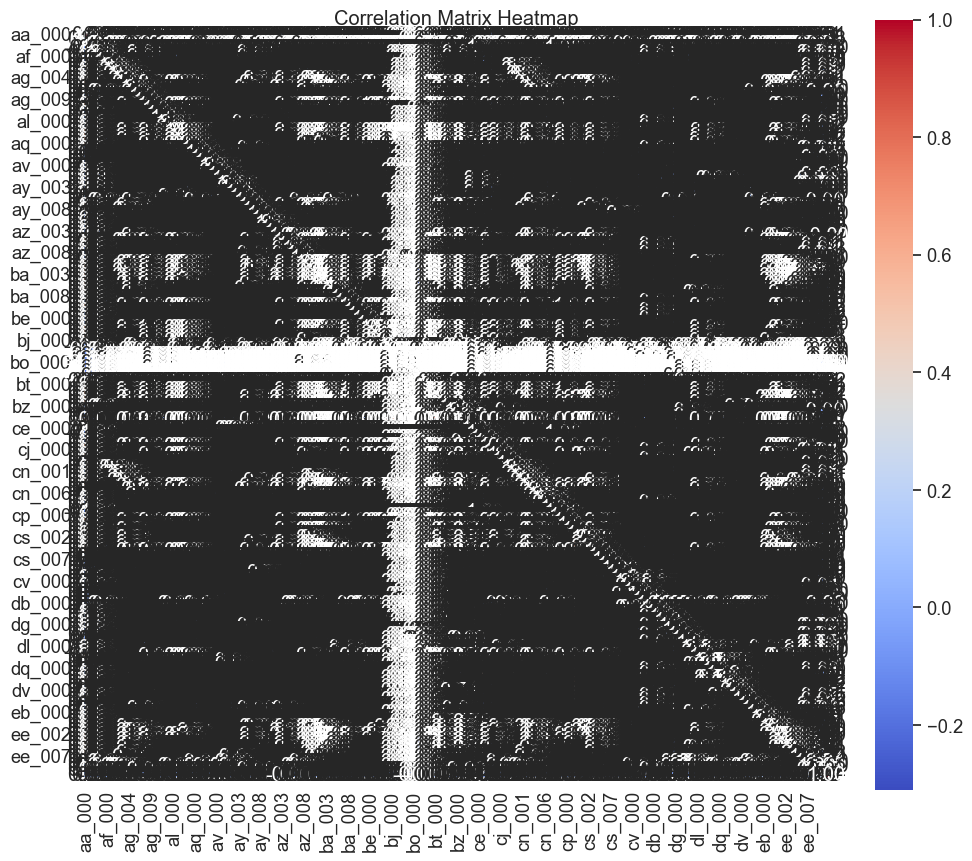

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = APS_all.iloc[:, 1:].corr()

# Set up the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# Add title and show plot
plt.title("Correlation Matrix Heatmap")
plt.show()


### iv. 
Pick $\sqrt{170}$ features with the highest CV, and make scatter plots and box plots for them, similar to those on p.129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization. 

In [140]:
# Sort CV and obtian top CV indexes
APS_top_cv = APS_cv.sort_values(by=['CV'], ascending=False).head(math.floor(math.sqrt(170)))
top_index = APS_top_cv.index.to_list()
display(APS_top_cv)

,CV
cf_000,20733.593026
co_000,20694.154913
ad_000,20678.680935
cs_009,19249.819432
dj_000,12216.999433
as_000,11389.589918
dh_000,11266.658810
df_000,11127.925843
ag_000,9146.552047
au_000,8609.034659


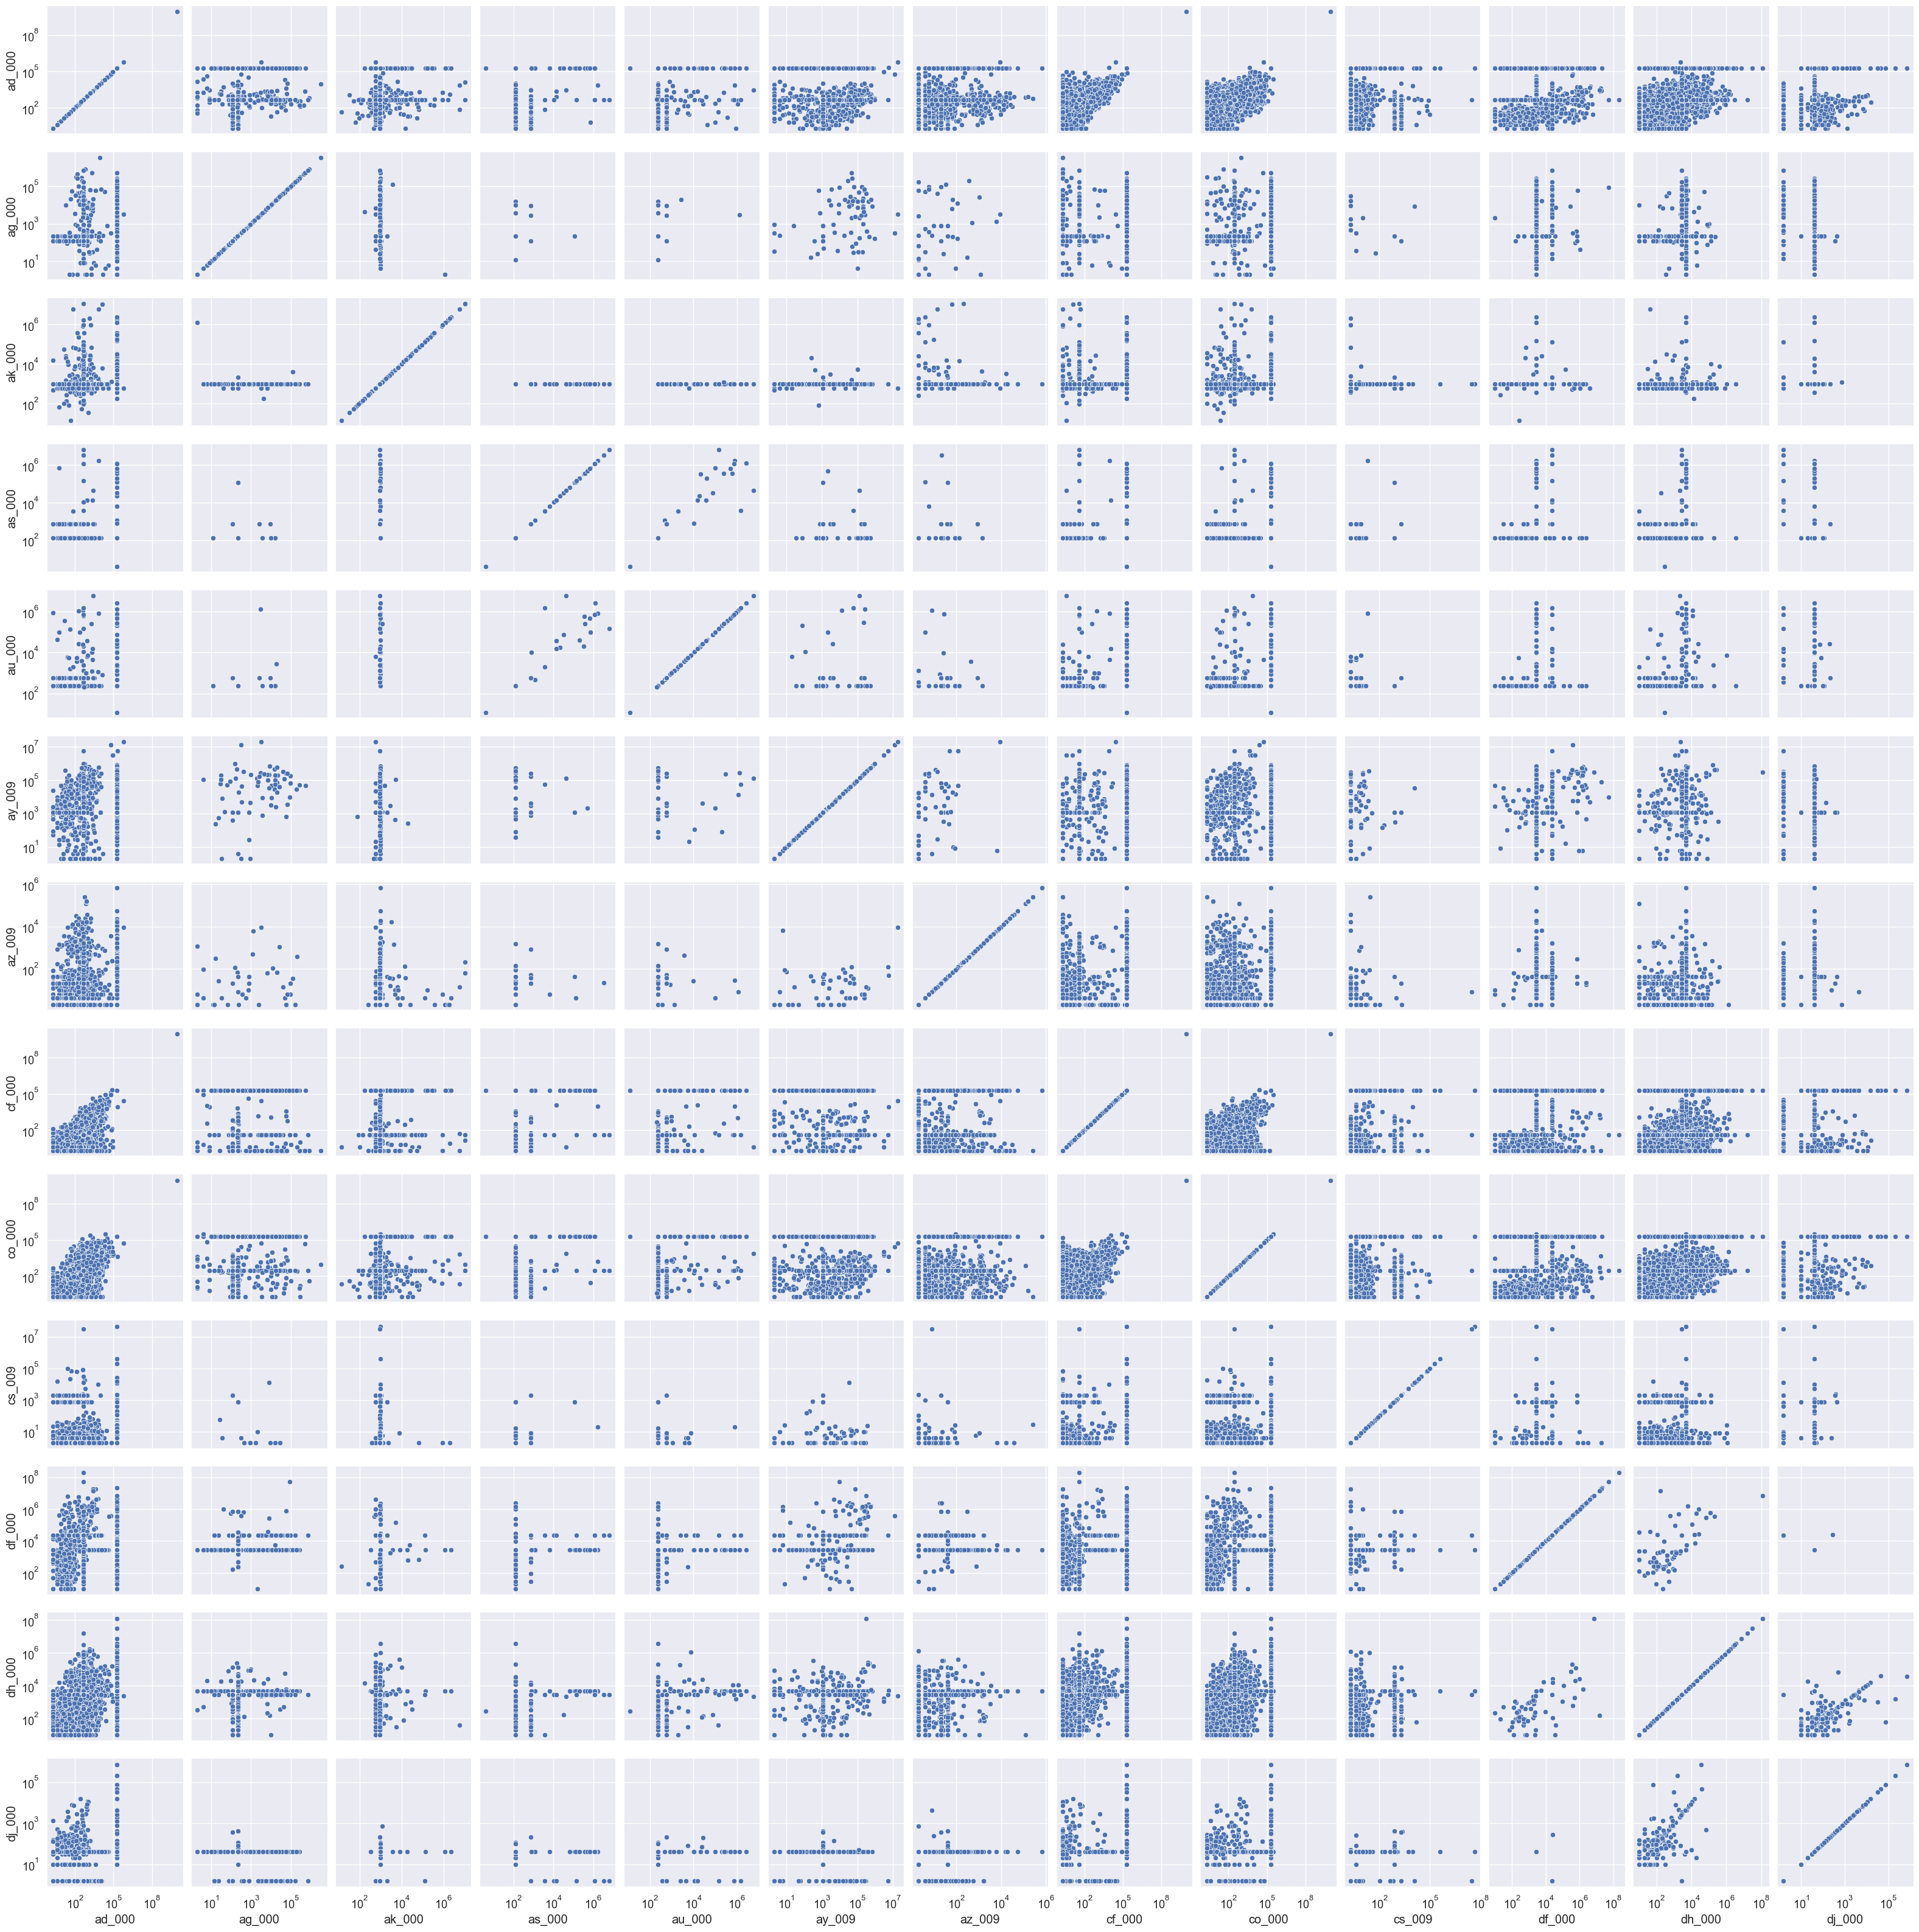

--- 56.94655990600586 seconds ---


In [141]:
# Make scatter plots for top CV features
APS_cv_features = APS_all[APS_all.columns.intersection(top_index)]
# Calculate running time
start_time = time.time()
# sns.pairplot(APS_cv_features)
pairplots = sns.pairplot(APS_cv_features, diag_kind=None)  # Set diagnal to None to save running time
pairplots.set(xscale="log", yscale="log")  # Use log scale for better display result
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

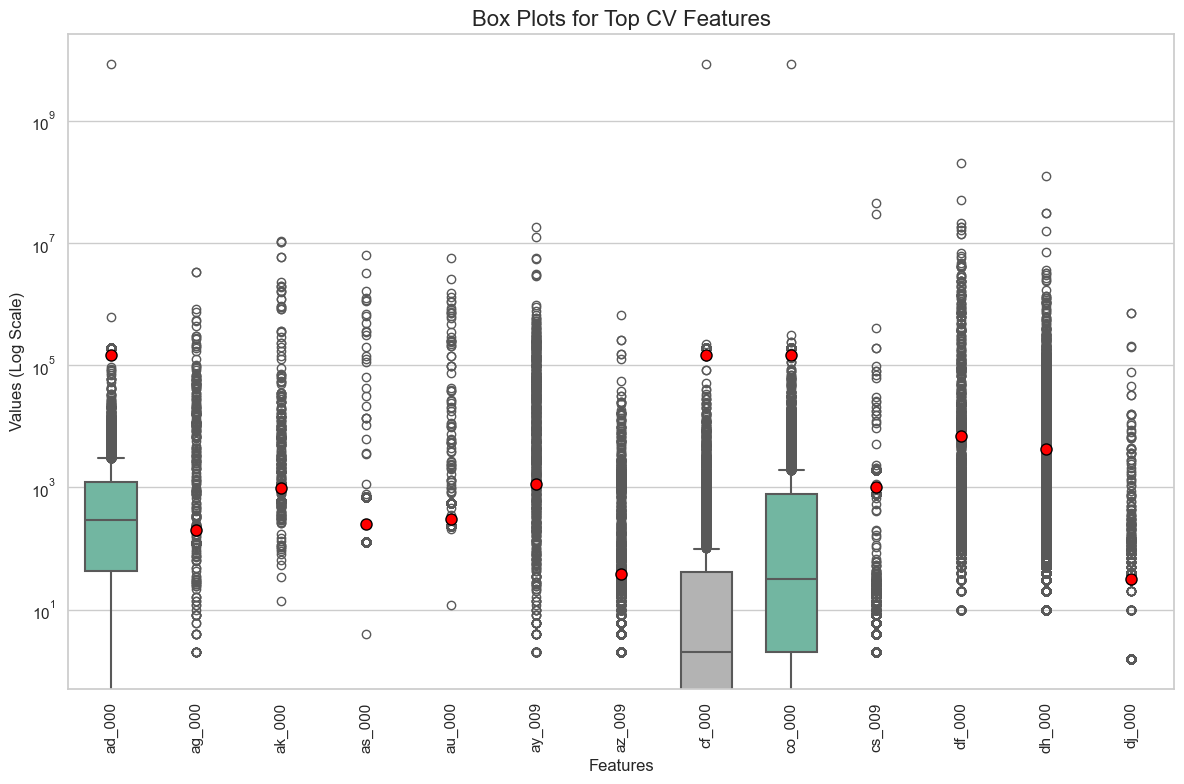

In [142]:
# Set Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Create the boxplot with customizations
plt.figure(figsize=(12, 8))
boxplots = sns.boxplot(data=APS_cv_features, showmeans=True, 
                       meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black", "markersize":8},
                       linewidth=1.5, width=0.6, palette="Set2")

# Set log scale for better display of feature values
boxplots.set(yscale="log")

# Add title and labels
plt.title("Box Plots for Top CV Features", fontsize=16)
plt.ylabel("Values (Log Scale)", fontsize=12)
plt.xlabel("Features", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

### v) 
Determine the number of positive and negative data. Is this dataset imbalanced 

In [143]:
# Display the number of positive and negative labels in the class column 
display(APS_all["class"].value_counts())

neg    74625
pos     1375
Name: class, dtype: int64

The values above have shown that there are 74625 negative labels in the training set and only 1375 positive labels. Only 1.8% of labels from the dataset are classified as positive samples, indicating a vast class imbalance. 

## c) 
Train a random forest to classify the data set. DO NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forest and compare it to the test error. 

In [144]:
# Split features and target 
X_train = APS_train.iloc[:, 1:]
y_train = APS_train.iloc[:, :1]
X_test = APS_test.iloc[:, 1:]
y_test = APS_test.iloc[:, :1]

In [145]:
# Initialize RF with OOB estimation 
# rf = RandomForestClassifier(n_estimators=100, oob_score=True, max_features='sqrt', random_state=42)
rf = RandomForestClassifier(oob_score=True)

# Train the model 
rf.fit(X_train, y_train)

# Get OOB error estimate (1 - accuracy) 
oob_error = 1 - rf.oob_score_
print(f"OOB Error Estimate: {oob_error:4f}")

# Make predictions on training set 
y_pred_train = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {train_accuracy:.4f}")

# Evaluate on test set 
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


OOB Error Estimate: 0.006183
Train Accuracy: 1.0000
Test Accuracy: 0.9924


### Training Set Confusion Matrix

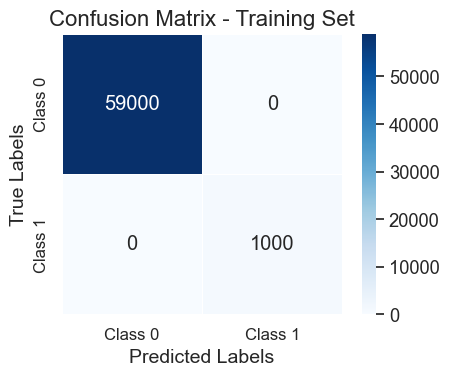

In [146]:
# Calculate confusion matrix for the training set
CM1 = confusion_matrix(y_train, y_pred_train)

# Set up the figure size and font scale for better readability
plt.figure(figsize=(5, 4))
sns.set(font_scale=1.2)  # Adjust font size for annotations

# Create a heatmap with Seaborn
ax = sns.heatmap(CM1, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)

# Add labels, title, and ticks
ax.set_xlabel("Predicted Labels", fontsize=14)
ax.set_ylabel("True Labels", fontsize=14)
ax.set_title("Confusion Matrix - Training Set", fontsize=16)
ax.xaxis.set_ticklabels(['Class 0', 'Class 1'], fontsize=12)  # Replace with actual class names if available
ax.yaxis.set_ticklabels(['Class 0', 'Class 1'], fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

### Testing Set Confusion Matrix

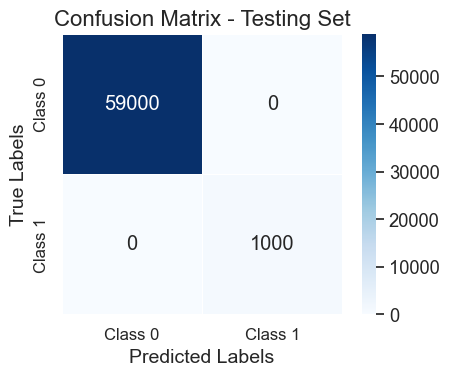

In [147]:
# Calculate confusion matrix for the training set
CM2 = confusion_matrix(y_train, y_pred_train)

# Set up the figure size and font scale for better readability
plt.figure(figsize=(5, 4))
sns.set(font_scale=1.2)  # Adjust font size for annotations

# Create a heatmap with Seaborn
ax = sns.heatmap(CM2, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)

# Add labels, title, and ticks
ax.set_xlabel("Predicted Labels", fontsize=14)
ax.set_ylabel("True Labels", fontsize=14)
ax.set_title("Confusion Matrix - Testing Set", fontsize=16)
ax.xaxis.set_ticklabels(['Class 0', 'Class 1'], fontsize=12)  # Replace with actual class names if available
ax.yaxis.set_ticklabels(['Class 0', 'Class 1'], fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

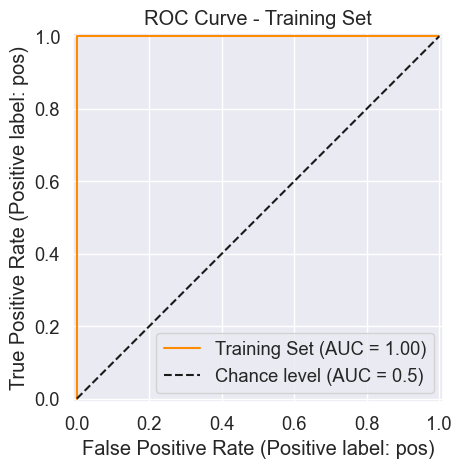

In [148]:
# Get predicted probabilities for the TRAINING set
y_train_proba = rf.predict_proba(X_train)[:, 1]  # Probabilities for positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba, pos_label='pos')
train_auc = roc_auc_score(y_train, y_train_proba)

# Method 2: Using scikit-learn's built-in display (recommended)
forest_train_disp = RocCurveDisplay.from_estimator(
    rf,
    X_train,
    y_train,
    name='Training Set',
    plot_chance_level=True,
    color='darkorange'
)
plt.title('ROC Curve - Training Set')
plt.show()

In [149]:
# Display classification report and confusion matrix for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate misclassification
TN = CM1[0][0]
FN = CM1[1][0]
TP = CM1[1][1]
FP = CM1[0][1]
train_misclassification = (FN + FP) / (TN + FN + TP + FP)
print("Train misclassification:", train_misclassification)

Classification Report:
              precision    recall  f1-score   support

         neg       0.99      1.00      1.00     15625
         pos       0.93      0.73      0.82       375

    accuracy                           0.99     16000
   macro avg       0.96      0.86      0.91     16000
weighted avg       0.99      0.99      0.99     16000

Train misclassification: 0.0


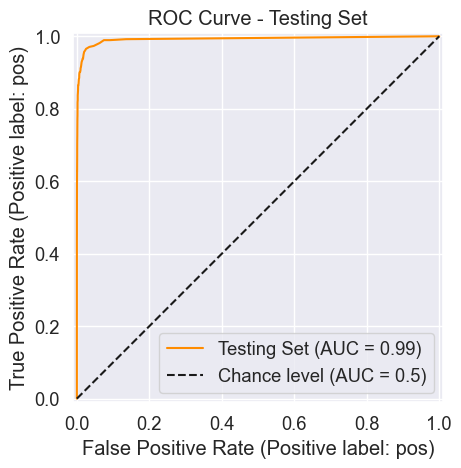

In [150]:
# Get predicted probabilities for the testing set
y_test_proba = rf.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba, pos_label='pos')
train_auc = roc_auc_score(y_test, y_test_proba)

# Method: Using scikit-learn's built-in display 
forest_test_disp = RocCurveDisplay.from_estimator(
    rf,
    X_test,
    y_test,
    name='Testing Set',
    plot_chance_level=True,
    color='darkorange'
)
plt.title('ROC Curve - Testing Set')
plt.show()

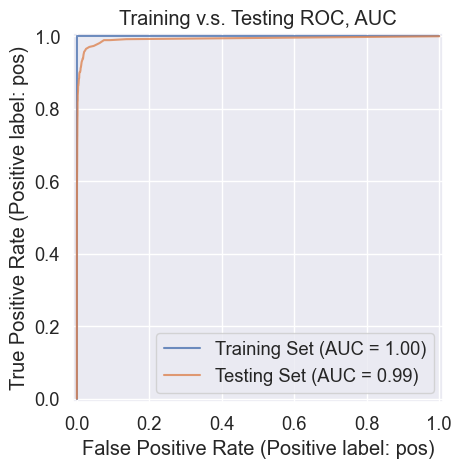

In [151]:
# Plot ROC, AUC for training and testing set
ax = plt.gca()
forest_train_disp.plot(ax=ax, alpha=0.8)
forest_test_disp.plot(ax=ax, alpha=0.8)
plt.title("Training v.s. Testing ROC, AUC")
plt.show()

In [152]:
# Calculate misclassification
TN = CM2[0][0]
FN = CM2[1][0]
TP = CM2[1][1]
FP = CM2[0][1]
test_misclassification = (FN + FP) / (TN + FN + TP + FP)
print("Test misclassification:", test_misclassification)


Test misclassification: 0.0


When comparing the Out of Bag error estimate and the test error, we find that Out of Bag error estimate is less than the test error

### d) 
Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c. 

In [153]:
# Fit random forest classifier compensate for class imbalance 
forest_balanced = RandomForestClassifier(oob_score=True, class_weight='balanced')

# Train the model 
forest_balanced.fit(X_train, y_train)

# Make predictions on the training set 
y_pred_train = forest_balanced.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {train_accuracy:.4f}")

# Make predictions on the testing set 
y_pred_test = forest_balanced.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get OOB error estimate (1 - accuracy) 
oob_error = 1 - rf.oob_score_
print(f"OOB Error Estimate: {oob_error:4f}")

/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Accuracy: 1.0000
Test Accuracy: 0.9891
OOB Error Estimate: 0.006183


### Balanced Training Set Statistics 

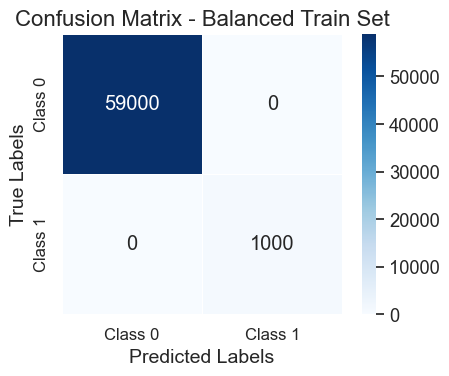

In [154]:
# Calculate confusion matrix for the training set
CM3 = confusion_matrix(y_train, y_pred_train)

# Set up the figure size and font scale for better readability
plt.figure(figsize=(5, 4))
sns.set(font_scale=1.2)  # Adjust font size for annotations

# Create a heatmap with Seaborn
ax = sns.heatmap(CM3, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)

# Add labels, title, and ticks
ax.set_xlabel("Predicted Labels", fontsize=14)
ax.set_ylabel("True Labels", fontsize=14)
ax.set_title("Confusion Matrix - Balanced Train Set", fontsize=16)
ax.xaxis.set_ticklabels(['Class 0', 'Class 1'], fontsize=12)  # Replace with actual class names if available
ax.yaxis.set_ticklabels(['Class 0', 'Class 1'], fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


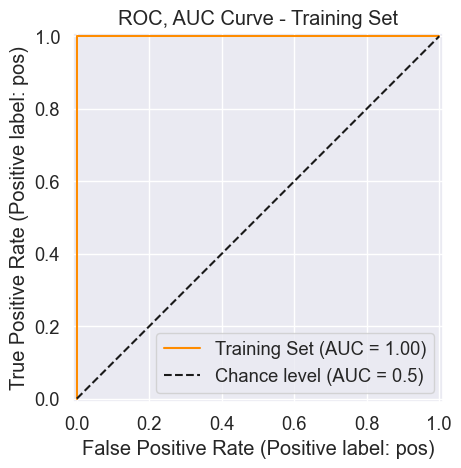

In [155]:
# Get predicted probabilities for the TRAINING set
y_train_proba = forest_balanced.predict_proba(X_train)[:, 1]  # Probabilities for positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba, pos_label='pos')
train_auc = roc_auc_score(y_train, y_train_proba)

# Method 2: Using scikit-learn's built-in display (recommended)
forest_train_disp = RocCurveDisplay.from_estimator(
    forest_balanced,
    X_train,
    y_train,
    name='Training Set',
    plot_chance_level=True,
    color='darkorange'
)
plt.title('ROC, AUC Curve - Training Set')
plt.show()

In [156]:
# Display classification report and confusion matrix for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate misclassification
TN = CM3[0][0]
FN = CM3[1][0]
TP = CM3[1][1]
FP = CM3[0][1]
train_misclassification = (FN + FP) / (TN + FN + TP + FP)
print("Train misclassification:", train_misclassification)

Classification Report:
              precision    recall  f1-score   support

         neg       0.99      1.00      1.00     15625
         pos       0.93      0.73      0.82       375

    accuracy                           0.99     16000
   macro avg       0.96      0.86      0.91     16000
weighted avg       0.99      0.99      0.99     16000

Train misclassification: 0.0


### Balanced Testing Set Statistics 

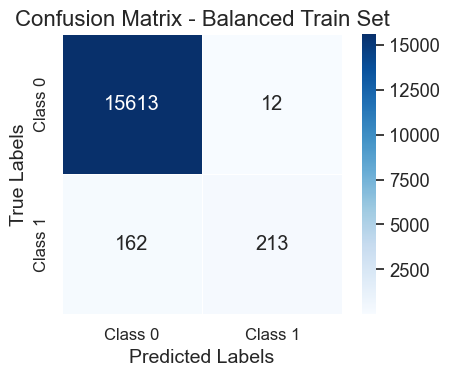

In [157]:
# Calculate confusion matrix for the training set
CM4 = confusion_matrix(y_test, y_pred_test)

# Set up the figure size and font scale for better readability
plt.figure(figsize=(5, 4))
sns.set(font_scale=1.2)  # Adjust font size for annotations

# Create a heatmap with Seaborn
ax = sns.heatmap(CM4, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)

# Add labels, title, and ticks
ax.set_xlabel("Predicted Labels", fontsize=14)
ax.set_ylabel("True Labels", fontsize=14)
ax.set_title("Confusion Matrix - Balanced Train Set", fontsize=16)
ax.xaxis.set_ticklabels(['Class 0', 'Class 1'], fontsize=12)  # Replace with actual class names if available
ax.yaxis.set_ticklabels(['Class 0', 'Class 1'], fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


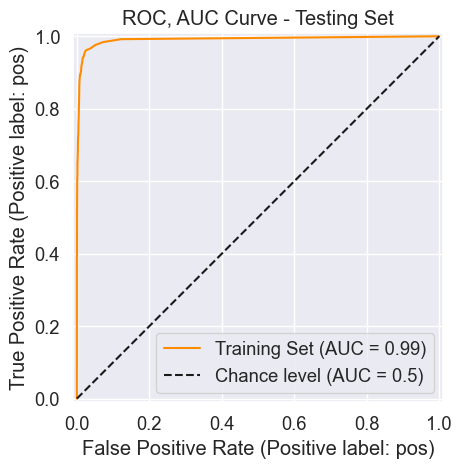

In [158]:
# Get predicted probabilities for the TESTING set
y_test_proba = forest_balanced.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba, pos_label='pos')
test_auc = roc_auc_score(y_test, y_test_proba)

# Method 2: Using scikit-learn's built-in display (recommended)
forest_test_disp = RocCurveDisplay.from_estimator(
    forest_balanced,
    X_test,
    y_test,
    name='Training Set',
    plot_chance_level=True,
    color='darkorange'
)
plt.title('ROC, AUC Curve - Testing Set')
plt.show()

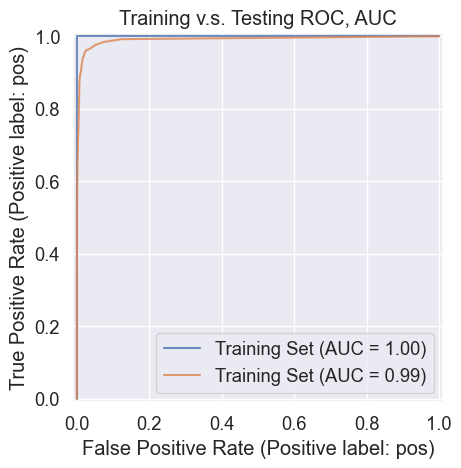

In [159]:
ax = plt.gca()
forest_train_disp.plot(ax=ax, alpha=0.8)
forest_test_disp.plot(ax=ax, alpha=0.8)
plt.title("Training v.s. Testing ROC, AUC")
plt.show()

In [160]:
# Display classification report and confusion matrix for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Calculate misclassification
TN = CM4[0][0]
FN = CM4[1][0]
TP = CM4[1][1]
FP = CM4[0][1]
test_misclassification = (FN + FP) / (TN + FN + TP + FP)
print("Test misclassification:", test_misclassification)

Classification Report:
              precision    recall  f1-score   support

         neg       0.99      1.00      0.99     15625
         pos       0.95      0.57      0.71       375

    accuracy                           0.99     16000
   macro avg       0.97      0.78      0.85     16000
weighted avg       0.99      0.99      0.99     16000

Test misclassification: 0.010875


In [161]:
oob_score = forest_balanced.oob_score_
print("Out of Bag error:", 1 - oob_score)

Out of Bag error: 0.007933333333333348


The Out of Bag error estimate in the balanced testing data case is less than the overall test error. 

Now if we compare our test misclassification scores from the imbalanced data and the balanced data (Imbalanced: 0.0076875 and Balanced: 0.0113125) we find that the model does better without compensating for class imbalance. 

However, the reasoning behind this might be because the dataset is imbalanced, the decision tree is relyin on the majority class samples to make a decision. 

### e) 
In the case of a univariate tree, only one input dimension is used at a tree split.
In a multivariate tree, or model tree, at a decision node all input dimensions can be used and this it is more general. n univariate classification trees, majority
polling is used at each node to determine the split of that node as the decision
rule. In model trees, a (linear) model that relies on all of the variables is used
to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has ∑j BjXj > s as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each note, a linear regression model is used to determine the value associated with that node. 

One of the methods that can be used at each node is Logistic Regression. Because
the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation. Train the model for the APS
data set without compensation for class imbalance. Use one of 5 fold, 10 fold,
and leave-one-out cross validation methods to estimate the error of your trained
model and compare it with the test error. Report the Confusion Matrix, ROC,
and AUC for training and test sets

In [172]:
# Convert string labels (neg or pos) to integers (0,1)
y_train_encoded = LabelEncoder().fit_transform(y_train)
y_test_encoded = LabelEncoder().fit_transform(y_test)

# 2. Define regularization search space
param_grid = {
    'reg_alpha': [0.1, 1, 10, 100],  # L1 regularization candidates
    'reg_lambda': [0.1, 1, 10, 100]   # L2 regularization candidates
}

# 3. Initialize XGBoost model
xgb_model = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

# 4. Configure grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)

# 5. Execute search
grid_search.fit(X_train, y_train_encoded)  # Use X_train/y_train directly

# 6. Get results
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best regularization terms: {best_params}")
print(f"Cross-validation accuracy: {best_score:.3f}")


/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best regularization terms: {'reg_alpha': 0.1, 'reg_lambda': 1}
Cross-validation accuracy: 0.993


In [173]:
# Refit the model 
xgb_refit = XGBClassifier(verbosity=0, reg_lambda=1)
xgb_refit.fit(X_train, y_train_encoded)

# Make predictions for training and testing data 
xgb_refit_train_pred = xgb_refit.predict(X_train)
xgb_refit_test_pred = xgb_refit.predict(X_test)

In [171]:
# Find training error and testing error
print("Train error:", 1-accuracy_score(y_train_encoded, xgb_refit_train_pred))
print("Test error:", 1-accuracy_score(y_test_encoded, xgb_refit_test_pred))

Train error: 1.666666666666483e-05
Test error: 0.0063750000000000195


### Training Set Statistics 

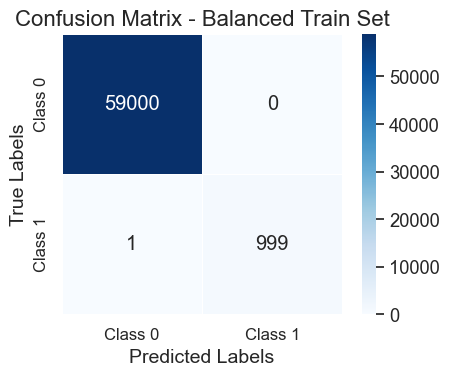

In [174]:
# Calculate confusion matrix for the training set
CM5 = confusion_matrix(y_train_encoded, xgb_refit_train_pred)

# Set up the figure size and font scale for better readability
plt.figure(figsize=(5, 4))
sns.set(font_scale=1.2)  # Adjust font size for annotations

# Create a heatmap with Seaborn
ax = sns.heatmap(CM5, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)

# Add labels, title, and ticks
ax.set_xlabel("Predicted Labels", fontsize=14)
ax.set_ylabel("True Labels", fontsize=14)
ax.set_title("Confusion Matrix - Balanced Train Set", fontsize=16)
ax.xaxis.set_ticklabels(['Class 0', 'Class 1'], fontsize=12)  # Replace with actual class names if available
ax.yaxis.set_ticklabels(['Class 0', 'Class 1'], fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

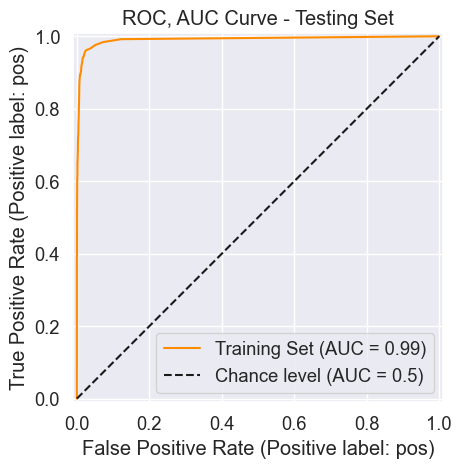

In [175]:
# Get predicted probabilities for the TESTING set
y_test_proba = xgb_refit.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba, pos_label='pos')
test_auc = roc_auc_score(y_test, y_test_proba)

# Method 2: Using scikit-learn's built-in display (recommended)
forest_test_disp = RocCurveDisplay.from_estimator(
    forest_balanced,
    X_test,
    y_test,
    name='Training Set',
    plot_chance_level=True,
    color='darkorange'
)
plt.title('ROC, AUC Curve - Testing Set')
plt.show()

### f) 
Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train XGBoost with L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and wrong way to cross validate here. Compare the uncompensated case with SMOTE case. 

In [178]:
# Declare list of lambda values
lambdas = [10**i for i in range(-4, 4)]

# Set up pipeline
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=5)],  # Use SMOTE in each iteration
                                ['xgb_model', XGBClassifier(verbosity=0)]])

param_grid = {'xgb_model__reg_alpha': lambdas}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           refit=True,
                           cv=10,)

# Calculate running time
start_time = time.time()
grid_search.fit(X_train, y_train_encoded)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')
print("--- %s seconds ---" % (time.time() - start_time))

Cross-validation score: 0.9896677118644069
Test score: 0.9911772160000001
--- 443.7244300842285 seconds ---


# 2. ISLR 6.6.3

### (a)
Training RSS 

The training RSS will steadily decrease. Since we are decreasing the restrictions put on Bj's, the model will become more flexible and as a result the training RSS will steadily decrease. 

### (b)
Test RSS 

The Test RSS will decrease initially, and then eventually start increasing in a U shape. Since we increase s starting from 0 so that the restriction on the coefficient Bj are less than before. In return, the model will have more flexibility. This indicates that the test RSS decreases at first and after a certain point the test RSS increases. 

### (c) 
Variance 

The variance will steadily increase. We are increasing the model's flexibility by relaxing the restriction on Bj's, so subsequently this will lead to higher variance. 

### (d)

Squared Bias 

The squared bias will steadily decrease. Similar to what happens to the variance, since we are relaxing the restriction on Bj's, the model will include more flexibility. In the end, this leads to a decrease in the squared bias. 

# 3. ISLR 6.6.5

### (a)
We can write the optimization problem as

$$
(y_1 - \hat{\beta}_1 x_1 - \hat{\beta}_2 x_1)^2 + (y_2 - \hat{\beta}_1 x_2 - \hat{\beta}_2 x_2)^2 + \lambda(\hat{\beta}^2_1+ \hat{\beta}^2_2)
$$

letting $x_{11} = x_{12} = x_1$ and $x_{21} = x_{22} = x_2$.

### (b)
Argue that in this setting, the ridge coefficient estimates satisfy $\hat{\beta}_1 = \hat{\beta}_2$.

We need take partial derivative with respect to $\hat{\beta}_1$ and $\hat{\beta}_2$ and set them equal to 0.

$$
\begin{align*}
\frac{\partial}{\partial \hat{\beta}_1} 
    &= \hat{\beta}_1 (x^2_1 - x^2_1 + \lambda) + \hat{\beta}_2 (x^2_1 + x^2_2) - y_1 x_1 - y_2 x_2 \\
\frac{\partial}{\partial \hat{\beta}_2} 
    &= \hat{\beta}_1 (x^2_1 - x^2_1) + \hat{\beta}_2 (x^2_1 + x^2_2 + \lambda) - y_1 x_1 - y_2 x_2 
\end{align*}
$$

If we set both equal to 0 and move $(- y_1 x_1 - y_2 x_2)$ on the same side, we will see that the equation suggest the result of $\hat{\beta}_1 = \hat{\beta}_2$.

### (c)
Write out the lasso optimization problem in this setting.

We can use similar settin gas in part (a) such that $x_{11} = x_{12} = x_1$ and $x_{21} = x_{22} = x_2$. Then the optimization problem is that 

$$
(y_1 - \hat{\beta}_1 x_1 - \hat{\beta}_2 x_1)^2 + (y_2 - \hat{\beta}_1 x_2 - \hat{\beta}_2 x_2)^2 + \lambda(|\hat{\beta}_1| + |\hat{\beta}_2|)
$$

and the regularization term is at the end characterized by $$ \lambda(|\hat{\beta}_1| + |\hat{\beta}_2|) $$

### (d)
Argue that in this setting, the lasso coefficients $\hat{\beta}_1$ and $\hat{\beta}_2$ are not unique - in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.

The solution to the lasso coefficients are not unique given that the constraints of the lasso form a diamond like graph in the plane. The diamond geometry explains why lasso are non-unique because the geometric "flatness" mirrors the algebraic rank deficiency in X, allowing infinitely many coefficient combinations to achieve the same penalized loss. 

# 4. ISLR 8.4.5

When using the majority vote approach to this problem, we see there are 6 vote for Red and 4 vote for Green. In this situation, Red is the majority, so we classify X as Red.

The average of the probability for class Red from probabilities given in the problem statement is 0.45. In this case, we classify X as Green.

# 5. ISLR 9.7.3

## (a)
Sketch the observations 

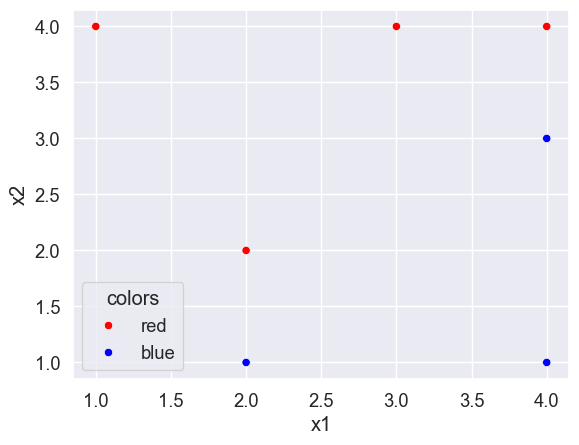

In [184]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
colors = ["red", "red", "red", "red", "blue", "blue", "blue"]
df_obs = pd.DataFrame(dict(x1=x1, x2=x2, colors=colors))
sns.scatterplot(data=df_obs, x='x1', y='x2', hue='colors', palette=['red','blue'])
plt.show()

## (b) 
Sketch the optimal seperating hyperplane, and provide the equation for this hyperplane.

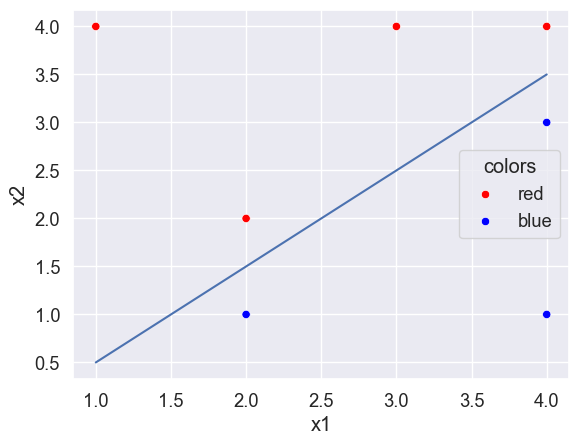

In [185]:
# Add line to seperate the plane
x = [1, 2, 3, 4]
y = [i-0.5 for i in x]
plt.plot(x, y)
sns.scatterplot(data=df_obs, x='x1', y='x2', hue='colors', palette=['red','blue'])
plt.show()

## (c) 
Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if $\beta_0 + \beta_1 X_1 + \beta_2 X_2 > 0$, and classify to Blue otherwise.” Provide the values for $\beta_0$, $\beta_1$, and $\beta_2$.

The classifier should be written as $f(X) = 0.5 - X_1 + X_2$. We classify to Red if $f(X) > 0$, Blue otherwise.

## (d) 
On your sketch, indicate the margin for the maximal margin hyperplane.

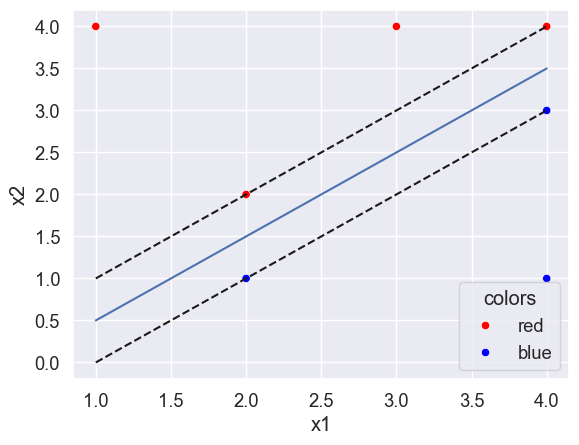

In [186]:
# Add line to seperate the plane
x = [1, 2, 3, 4]
y = [i-0.5 for i in x]
y1 = [i-1 for i in x]
y2 = [i for i in x]
plt.plot(x, y)
plt.plot(x, y1, 'k--')
plt.plot(x, y2, 'k--')
sns.scatterplot(data=df_obs, x='x1', y='x2', hue='colors', palette=['red','blue'])
plt.show()

## (e) 
Indicate the support vectors for the maximal margin classifier.

The support vector is Red: $(2, 2)$ and $(4, 4)$ and Blue: $(2, 1)$ and $(4, 3)$.

## (f) 
Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

The seventh observation is not a support vector because only a large movement would affect the maximal margin hyperplane. When the movement is small it will not affect the maximal margin hyperplane. 

## (g) 
Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

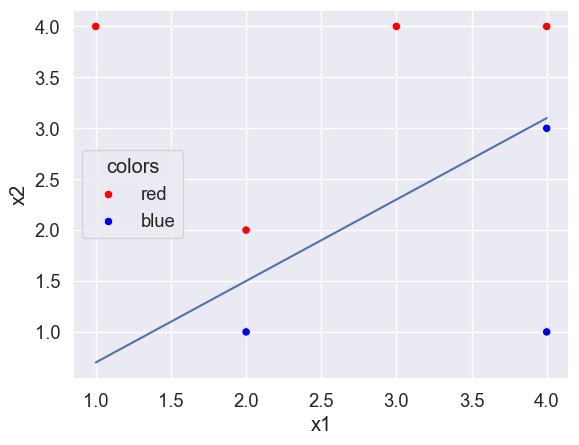

In [188]:
# Add line to seperate the plane
x = [1, 2, 3, 4]
y3 = [0.8*i-0.1 for i in x]
plt.plot(x, y3)
sns.scatterplot(data=df_obs, x='x1', y='x2', hue='colors', palette=['red','blue'])
plt.show()


## (h) 
Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

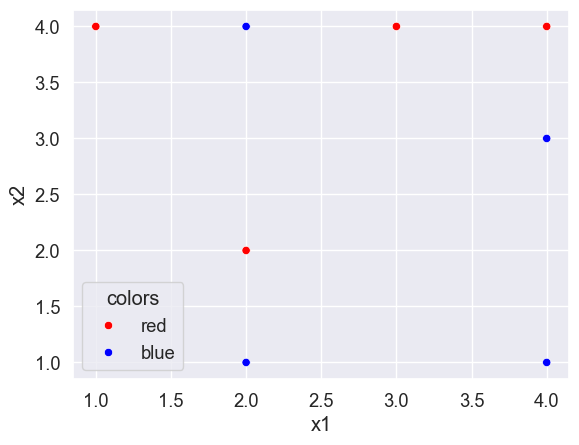

In [189]:
# Add another blue dot
x1 = [3, 2, 4, 1, 2, 4, 4, 2]
x2 = [4, 2, 4, 4, 1, 3, 1, 4]
colors = ["red", "red", "red", "red", "blue", "blue", "blue", "blue"]
df_obs = pd.DataFrame(dict(x1=x1, x2=x2, colors=colors))
sns.scatterplot(data=df_obs, x='x1', y='x2', hue='colors', palette=['red','blue'])
plt.show()

### References 


[Bagging and Random Forest for Imbalanced Classification](https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/)

[Imbalance Learn Pipeline](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html)

[OOB Errors for Random Forests](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html)

[ROC Curve with Visualization API](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html)

[sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[sklearn.metrics.RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html)

[Surviving in a Random Forest with Imbalanced Datasets](https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb)

[The right way of using SMOTE with Cross-validation](https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7)